In [43]:
import pandas as pd
import numpy as np
import blinksear as ear
import blinksdistance as distance
import blinkscolors as colors
import json
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('data/distance-experiment-expose-points_1.csv')

,load_time,trial_type,trial_index,time_elapsed,internal_node_id,jspsych_start_time,success,item_width_mm,item_height_mm,item_width_px,px2mm,view_dist_mm,rt,item_width_deg,px2deg,win_width_deg,win_height_deg,webgazer_data,webgazer_targets,events
0,3129.0,webgazer-init-camera,0,7753,0.0-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,events-tracking-start,1,7753,0.0-1.0,2024-09-20T17:40:55.260Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,fullscreen,2,10049,0.0-2.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,virtual-chinrest,3,42552,0.0-3.0,NaN,NaN,85.6,53.98,340.0,3.97,604.24,32502.0,8.103305,41.958190,45.759839,25.739909,"[{""x"":0,""y"":0,""t"":2,""importantKeypoints"":{""nos...",{},NaN
4,NaN,virtual-chinrest,4,75359,0.0-4.0,NaN,NaN,85.6,53.98,342.0,4.00,593.82,32806.0,8.245011,41.479631,46.287779,26.036876,"[{""x"":0,""y"":0,""t"":3,""importantKeypoints"":{""nos...",{},NaN
5,NaN,virtual-chinrest,5,110520,0.0-5.0,NaN,NaN,85.6,53.98,339.0,3.96,580.95,35161.0,8.427015,40.227769,47.728225,26.847127,"[{""x"":0,""y"":0,""t"":2,""importantKeypoints"":{""nos...",{},NaN
6,NaN,events-tracking-stop,6,110521,0.0-6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [63]:

df = pd.read_csv('data/distance-experiment-expose-points_1.csv')
df_webgazer = df[~df['webgazer_data'].isna()]

dfs = []
for row in range(len(df_webgazer)):
    # Convert the JSON string to a list of dictionaries
    data_list = json.loads(df_webgazer["webgazer_data"].iloc[row])
    # Create a DataFrame from the list of dictionaries
    df_tmp = pd.DataFrame(data_list)
    dfs.append(df_tmp)

df_webgazer = pd.concat(dfs)

In [108]:
df_virtual_chin = df[~df['view_dist_mm'].isna()]
df_virtual_chin.loc[:, ['view_dist_centimeters']] = df[~df['view_dist_mm'].isna()]['view_dist_mm'] / 10
# df_virtual_chin[['time_elapsed','view_dist_centimeters']].plot.scatter(x='time_elapsed', y='view_dist_centimeters')
df_virtual_chin['rt']

3    32502.0
4    32806.0
5    35161.0
Name: rt, dtype: float64

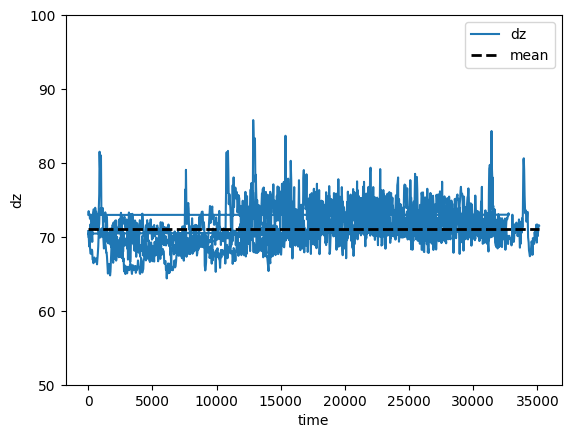

In [102]:
df_webgazer = df_webgazer.astype({"dz":float, "t":float})
df_webgazer.plot(x='t', y='dz')
plt.xlabel("time")
plt.ylabel("dz")
plt.ylim(50,100)
plt.hlines(df_webgazer['dz'].mean(), df_webgazer['t'].min(), df_webgazer['t'].max(),color='k', linestyle='--', lw=2, label='mean')
# plt.vlines(5000, 50, 100)
plt.legend()
plt.show()

In [103]:
df_webgazer['t'].max()

35134.0

3    60.424
4    59.382
5    58.095
Name: view_dist_mm, dtype: float64

In [105]:
df_webgazer.tail()

,x,y,t,importantKeypoints,leftEye,rightEye,dz
1029,0,0,34998.0,"{'noseX': 266.06, 'noseY': 305.13, 'topY': 224...","{'data': {'0': 104, '1': 60, '2': 41, '3': 255...","{'data': {'0': 91, '1': 46, '2': 28, '3': 255,...",71.67
1030,0,0,35028.0,"{'noseX': 266.26, 'noseY': 304.93, 'topY': 224...","{'data': {'0': 101, '1': 60, '2': 40, '3': 255...","{'data': {'0': 91, '1': 44, '2': 26, '3': 255,...",70.11
1031,0,0,35058.0,"{'noseX': 266.16, 'noseY': 305.38, 'topY': 224...","{'data': {'0': 102, '1': 59, '2': 41, '3': 255...","{'data': {'0': 89, '1': 45, '2': 27, '3': 255,...",70.71
1032,0,0,35091.0,"{'noseX': 266.28, 'noseY': 305.39, 'topY': 224...","{'data': {'0': 102, '1': 59, '2': 40, '3': 255...","{'data': {'0': 88, '1': 44, '2': 25, '3': 255,...",71.50
1033,0,0,35134.0,"{'noseX': 266.25, 'noseY': 305.62, 'topY': 224...","{'data': {'0': 101, '1': 59, '2': 42, '3': 255...","{'data': {'0': 88, '1': 43, '2': 26, '3': 255,...",71.53


In [57]:
pd.to_numeric(df_webgazer['dz'])

0       70.78
1       69.87
2       70.41
3       69.92
4       68.54
        ...  
1029    71.67
1030    70.11
1031    70.71
1032    71.50
1033    71.53
Name: dz, Length: 2955, dtype: float64

In [12]:
web = eval(df[~df['webgazer_data'].isna()]['webgazer_data'].iloc[0])

In [32]:
web[1]

{'x': 0,
 'y': 0,
 't': 53,
 'importantKeypoints': {'noseX': 294.27,
  'noseY': 300.58,
  'topY': 219.81,
  'bottomY': 362.54,
  'leftEarX': 350.02,
  'rightearX': 238.95,
  'rightEyeTopArc': [{'x': 305.14, 'y': 264.45, 'point': 463},
   {'x': 308.26, 'y': 262.74, 'point': 398},
   {'x': 311.43, 'y': 260.53, 'point': 384},
   {'x': 315.83, 'y': 259.02, 'point': 385},
   {'x': 320.16, 'y': 258.71, 'point': 386},
   {'x': 324.26, 'y': 259.39, 'point': 387},
   {'x': 326.78, 'y': 260.58, 'point': 388},
   {'x': 328.23, 'y': 261.41, 'point': 466},
   {'x': 329.17, 'y': 262.06, 'point': 263},
   {'x': 329.64, 'y': 265.32, 'point': 255}],
  'rightEyeBottomArc': [{'x': 305.14, 'y': 264.45, 'point': 463},
   {'x': 306.91, 'y': 266.11, 'point': 341},
   {'x': 309.71, 'y': 267.28, 'point': 256},
   {'x': 314.05, 'y': 268.51, 'point': 252},
   {'x': 318.98, 'y': 268.86, 'point': 253},
   {'x': 323.72, 'y': 268.46, 'point': 254},
   {'x': 327.58, 'y': 267.4, 'point': 339},
   {'x': 329.64, 'y': 26

In [23]:
pd.DataFrame(web[])

,x,y,t,importantKeypoints,leftEye,rightEye,dz
noseX,0,0,53,294.27,NaN,NaN,69.87
noseY,0,0,53,300.58,NaN,NaN,69.87
topY,0,0,53,219.81,NaN,NaN,69.87
bottomY,0,0,53,362.54,NaN,NaN,69.87
leftEarX,0,0,53,350.02,NaN,NaN,69.87
rightearX,0,0,53,238.95,NaN,NaN,69.87
rightEyeTopArc,0,0,53,"[{'x': 305.14, 'y': 264.45, 'point': 463}, {'x...",NaN,NaN,69.87
rightEyeBottomArc,0,0,53,"[{'x': 305.14, 'y': 264.45, 'point': 463}, {'x...",NaN,NaN,69.87
leftEyeTopArc,0,0,53,"[{'x': 258.1, 'y': 268.98, 'point': 25}, {'x':...",NaN,NaN,69.87
leftEyeBottomArc,0,0,53,"[{'x': 258.1, 'y': 268.98, 'point': 25}, {'x':...",NaN,NaN,69.87


In [11]:
for d in df[df['webgazer_data'].notna()]['webgazer_data'].map(eval):
    for i in d:
      rightEyeTopArc = list(map(lambda x: x['point'], i['importantKeypoints']['rightEyeTopArc']))
      rightEyeBottomArc = list(map(lambda x: x['point'], i['importantKeypoints']['rightEyeBottomArc']))
      leftEyeTopArc = list(map(lambda x: x['point'], i['importantKeypoints']['leftEyeTopArc']))
      leftEyeBottomArc = list(map(lambda x: x['point'], i['importantKeypoints']['leftEyeBottomArc']))
      print(rightEyeTopArc)
      print(rightEyeBottomArc)
      print(leftEyeTopArc)
      print(leftEyeBottomArc)


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7ff473758430>>
Traceback (most recent call last):
  File "/home/gus/Documents/enviroments/feedback/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


[463, 398, 384, 385, 386, 387, 388, 466, 263, 255]
[463, 341, 256, 252, 253, 254, 339, 255]
[25, 33, 246, 161, 160, 159, 158, 157, 173, 243]
[25, 110, 24, 23, 22, 26, 112, 243]
[463, 398, 384, 385, 386, 387, 388, 466, 263, 255]
[463, 341, 256, 252, 253, 254, 339, 255]
[25, 33, 246, 161, 160, 159, 158, 157, 173, 243]
[25, 110, 24, 23, 22, 26, 112, 243]
[463, 398, 384, 385, 386, 387, 388, 466, 263, 255]
[463, 341, 256, 252, 253, 254, 339, 255]
[25, 33, 246, 161, 160, 159, 158, 157, 173, 243]
[25, 110, 24, 23, 22, 26, 112, 243]
[463, 398, 384, 385, 386, 387, 388, 466, 263, 255]
[463, 341, 256, 252, 253, 254, 339, 255]
[25, 33, 246, 161, 160, 159, 158, 157, 173, 243]
[25, 110, 24, 23, 22, 26, 112, 243]
[463, 398, 384, 385, 386, 387, 388, 466, 263, 255]
[463, 341, 256, 252, 253, 254, 339, 255]
[25, 33, 246, 161, 160, 159, 158, 157, 173, 243]
[25, 110, 24, 23, 22, 26, 112, 243]
[463, 398, 384, 385, 386, 387, 388, 466, 263, 255]
[463, 341, 256, 252, 253, 254, 339, 255]
[25, 33, 246, 161, 160,

In [6]:
##wdata = df['webgazer_data']
##wdata = wdata[wdata==wdata];
##wdata

for d in df[df['webgazer_data'].notna()]['webgazer_data'].map(eval):
    for i in d:
      rightEyeTopArc = i['importantKeypoints']['rightEyeTopArc']
      rightEyeBottomArc = i['importantKeypoints']['rightEyeBottomArc']
      leftEyeTopArc = i['importantKeypoints']['leftEyeTopArc']
      leftEyeBottomArc = i['importantKeypoints']['leftEyeBottomArc']
      print(ear.isBlinkByEar(rightEyeTopArc, rightEyeBottomArc, leftEyeTopArc, leftEyeBottomArc))


[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False]


In [7]:
blinkDistance = distance.BlinkDistance()
for d in df[df['webgazer_data'].notna()]['webgazer_data'].map(eval):
    for i in d:
      rightEyeTopArc = i['importantKeypoints']['rightEyeTopArc']
      rightEyeBottomArc = i['importantKeypoints']['rightEyeBottomArc']
      leftEyeTopArc = i['importantKeypoints']['leftEyeTopArc']
      leftEyeBottomArc = i['importantKeypoints']['leftEyeBottomArc']
      print(blinkDistance.isBlinkByDistance(rightEyeTopArc, rightEyeBottomArc, leftEyeTopArc, leftEyeBottomArc))

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7ff473758430>>
Traceback (most recent call last):
  File "/home/gus/Documents/enviroments/feedback/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
[False, Fal

In [42]:
blinkColors= colors.Colors()
for d in df[df['webgazer_data'].notna()]['webgazer_data'].map(eval):
    for i in d:
      rightEyeTopArc = i['importantKeypoints']['rightEyeTopArc']
      rightEyeBottomArc = i['importantKeypoints']['rightEyeBottomArc']
      leftEyeTopArc = i['importantKeypoints']['leftEyeTopArc']
      leftEyeBottomArc = i['importantKeypoints']['leftEyeBottomArc']
      print(blinkColors.isBlink(rightEyeTopArc, rightEyeBottomArc, leftEyeTopArc, leftEyeBottomArc)

'hello, agustin'